# 泰坦尼克号数据分析


## 概况

  选择泰坦尼克号数据集作为分析数据。主要想探索存活情况与仓位等级（代表社会阶层）、性别、年龄、登船地点之间可能存在的关系，以及性别与仓位等级、船费与登船地点之间的关系。

## 初步处理数据

查看导入的数据，发现'Age'、'Cabin'、'Embarked'存在丢失值，由于后续分析要使用到'Age'和'Embarked'，所以预先将他们处理下，因为缺失值占比不大，所以决定直接将其舍去。'Cabin'由于本次分析没有涉及到，为了保持数据的完整性，不作处理。另外后面在分析'Sex'和'Embarked'时，因为要计算相关系数所以需要把值替换为数字，不过鉴于其他过程中可能还会用到该值，所以决定在具体计算相关系数时再进行转换。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# 导入数据
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
titanic_data.info()
titanic_data['Age'].dropna()
titanic_data['Embarked'].dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, dtype: object

## 幸存情况

根据数据集，泰坦尼克号上总共有乘客891人。按幸存情况进行分组，发现幸存342人，约占总数的38%；死亡549人，约占总数的62%。泰坦尼克号沉没确实是一场悲剧，死亡人数超过六成。下图为幸存与死亡人数的饼图。

Populating the interactive namespace from numpy and matplotlib
dead: 0.616161616162
survived: 0.383838383838


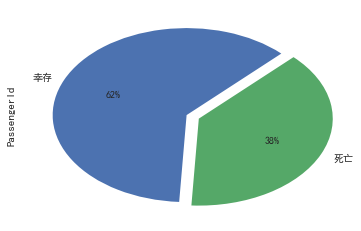

In [3]:
#  幸存人数与死亡人数，幸存342人，占比约38%；死亡549人，占比约62%
%pylab inline
matplotlib.rcParams['font.sans-serif']=['SimHei'] #  显示中文

def groupby(x):
    return titanic_data.groupby(x)

survived_data = groupby(['Survived'])


num_of_survived = survived_data['PassengerId'].count()
total_num = titanic_data['PassengerId'].count()

dead = num_of_survived[0]/total_num
survived = num_of_survived[1]/total_num

print("dead:",dead)
print("survived:",survived)

num_of_survived.plot(kind='pie',labels=("幸存","死亡"),explode=(0,0.1),autopct='%.0f%%',startangle=45)


## 幸存情况与仓位等级（社会经济状况）关系

将幸存情况和仓位等级进行分组，发现在死亡人数中，三等舱死亡最多，将近一半；而头等舱和二等舱死亡人数大体相同，头等舱略少于二等舱。而在幸存人数中，不同仓位差距不明显，二等舱略少于其他两个等级。可以看出三等舱死亡人数最多，但由于三等舱的基数大，所以死亡人数多也可以理解。因此接下来想要探索下各个仓位等级的死亡率，这个更能反应幸存情况与仓位等级的关系，一定程度上排除三等舱基数过大造成的误差。

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64


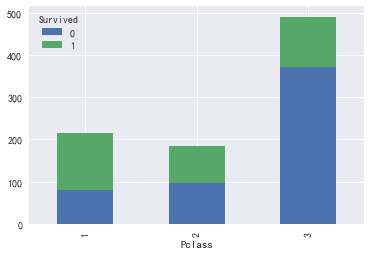

In [4]:
#  死亡方面，死亡人数最多的是三等舱，将近一半，头等舱和二等舱大体相等，头等舱死亡人数略少二等舱；幸存方面，三者都差不多，二等舱略少于头等舱及三等舱
# 下面的计算存在问题，不能看绝对人数，要看在各自人群中的比例。因为头等舱可能就10个人，结果10个人全死了，而三等舱有1000人只死了100人，虽然三等舱死亡人数大于头等舱，但是头等舱死亡比例更高

grade = groupby(['Survived','Pclass']).count()
print(grade['PassengerId'])

# labels = 'dead,1st','dead,2nd','dead,3rd','survived,1st','survived,2nd','survived,3rd'
# grade['PassengerId'].plot(kind='pie',labels=labels,explode=(0,0,0.,0.1,0.1,0.1),autopct='%1.0f%%')

groupby(['Pclass','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)



计算不同仓位的死亡率和幸存率，发现确实三等舱的死亡率最高，而幸存率最低；一等舱则死亡率最低，幸存率最高。推测一等舱的上层阶级更优先得到救援，而三等舱的底层阶级则反之。

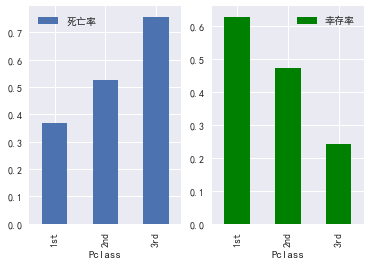

In [5]:
#  头等舱的死亡率最低，随着仓位等级的下降，死亡率升高；幸存率头等舱最高，随着仓位等级下降，幸存率下降。排除了只看绝对人数带来的误差

plt.subplot(121)
dead_pclass_percent = (1-groupby('Pclass')['Survived'].mean()).plot(kind='bar',label="死亡率")
plt.xticks((0,1,2),('1st','2nd','3rd'))
plt.legend()
plt.subplot(122)
survived_pclass_percent = groupby('Pclass')['Survived'].mean().plot(kind='bar',label="幸存率",color='g')
plt.xticks((0,1,2),('1st','2nd','3rd'))
plt.legend()

计算仓位等级与幸存与否的皮尔森相关系数，约为-0.338，为负相关。即为仓位等级越差（数值越高，因为1为头等舱，3为末等舱），死亡率越高（数值越低，因为幸存为1，死亡为0），但相关性不是很强

In [6]:
# 计算仓位等级与幸存与否的皮尔森相关系数，约为-0.338，为负相关。即为仓位等级越差（数值越高，因为1为头等舱，3为末等舱），死亡率越高（数值越低，因为幸存为1，死亡为0），但相关性不是很强

a = titanic_data['Pclass']
b = titanic_data['Survived']
np.corrcoef(a,b)

array([[ 1.        , -0.33848104],
       [-0.33848104,  1.        ]])

## 幸存情况与性别关系

将数据按幸存情况及性别分组，发现男性死亡468人，占总人数53%，超过一半以上；女性死亡81人，占9%。男性幸存109人，占总人数12%，女性幸存109人，占26%。

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


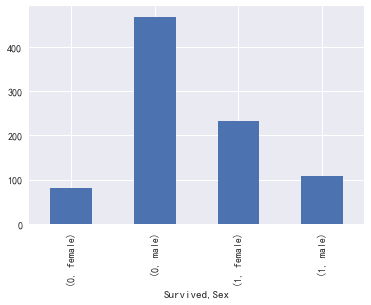

In [7]:
# 男性死亡468人，占总人数53%，超过一半以上；女性死亡81人，占9%；

sex = groupby(['Survived','Sex']).count()
print(sex['PassengerId'])

sex['PassengerId'].plot(kind='bar')

同样，因为男性的总人数远大于女性，单看男女的死亡、幸存人数并不科学，所以接着计算不同性别各自的死亡率。经计算发现，男性死亡率非常高，而幸存率极低，基本船上大部分男性都死于此次事故；女性幸存率非常高，死亡率很低，只有少部分女性死于此次事故。猜测为大部分男性都将获救的机会优先让给了女性。

In [8]:
# 计算男女人数,男性577人，女性314

female = groupby(['Sex'])['PassengerId'].count()[0]
male = groupby(['Sex'])['PassengerId'].count()[1]

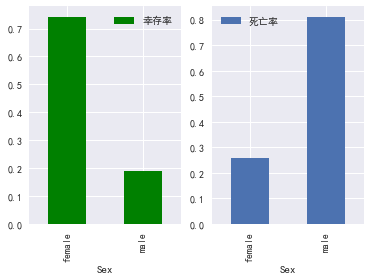

In [9]:
#  男性死亡率非常高，而幸存率极低，基本上大部分男性都死于此次事故；女性幸存率非常高，死亡率很低，少部分女性死于此次事故

plt.subplot(121)
groupby('Sex')['Survived'].mean().plot(kind='bar',label="幸存率",color='g')
plt.xticks((0,1),('female','male'))
plt.legend()
plt.subplot(122)
(1-groupby('Sex')['Survived'].mean()).plot(kind='bar',label="死亡率")
plt.xticks((0,1),('female','male'))
plt.legend()

接着探索性别与幸存情况自己的相关性强弱。由于sex属性并非是数字，所以corrcoef函数无法使用。因此将sex属性的值都转换为数字（female：0 male：1）,经计算呈负相关,越偏向男性幸存几率越低，相关系数为-0.54。

In [10]:
# 性别和幸存呈负相关，男性幸存几率更低，相关系数为-0.54

titanic_data['Sex'] = titanic_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int) 
np.corrcoef(titanic_data['Sex'], titanic_data['Survived'])

array([[ 1.        , -0.54335138],
       [-0.54335138,  1.        ]])

## 幸存情况与年龄关系

在数据中，有统计到年龄的共有714人，177人未能统计到年龄，为方便分析在初步处理数据时已经将缺失值舍弃。在统计到的年龄中，最小为0.42，最大为80，其中24岁年龄的人数最多，为30人。将年龄按每十岁为一个阶段，分为6个年龄段（最后一个为大于60），可以看出船上大部分人都是20-40岁的青壮年，其次为10-20岁的少年，猜测为一家人出行，家长带着孩子们。



In [11]:
# 共有多少人统计了年龄
age = groupby('Age')
age.count()['PassengerId'].sum()

# 哪个年龄统计到的人数最多，为多少
age.count()['PassengerId'].max()
age.count()['PassengerId'].argmax()

24.0

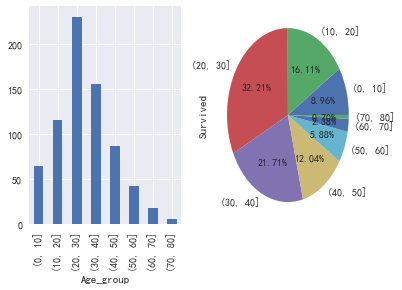

In [12]:
# 最大和最小年龄
titanic_data['Age'].min()
titanic_data['Age'].max()

# 将年龄分为8段
bins = np.arange(0,90,10)
titanic_data['Age_group'] = pd.cut(titanic_data['Age'],bins)
plt.subplot(121)
groupby('Age_group')['Survived'].count().plot(kind='bar')
plt.subplot(122)
groupby('Age_group')['Survived'].count().plot(kind='pie',autopct='%1.2f%%')

在死亡的名单中，年龄最小为1岁,最大为74岁;幸存的人最小0.42，最大80岁。其中21岁的人死亡最多，为19人。在统计到年龄的人群中，死亡人数最多的是20-40岁的青壮年，但幸存人数最多的同样也是20-40岁的青壮年。

In [13]:
# 死亡人数最多的年龄及人数
age2 = groupby(['Survived','Age'])
# print(age2.count()['PassengerId'])
age2.count()['PassengerId'][0].argmax()
age2.count()['PassengerId'][0].max()

# 死亡人数中最大及最小年龄，幸存人数中最大及最小年龄
groupby(['Survived'])['Age'].min()
groupby(['Survived'])['Age'].max()


Survived
0    74.0
1    80.0
Name: Age, dtype: float64

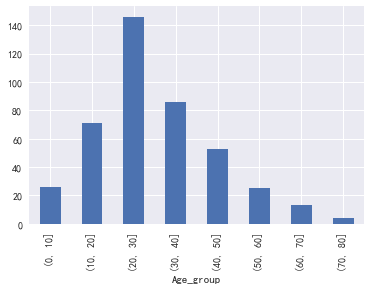

In [28]:
# 在统计到年龄的人群中，死亡人数最多的是20-40岁的青壮年

# plt.subplot(121)
groupby(['Survived','Age_group'])['Survived'].count()[0].plot(kind='bar')
# plt.subplot(122)
# groupby(['Survived','Age_group'])['Survived'].count()[0].plot(kind='pie',autopct='%1.2f%%')

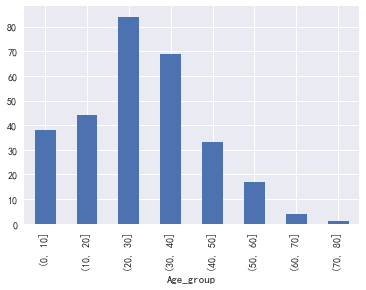

In [29]:
# 在统计到年龄的人群中，幸存人数最多的是20-40岁的青壮年

# plt.subplot(121)
groupby(['Survived','Age_group'])['Survived'].count()[1].plot(kind='bar')
# plt.subplot(122)
# groupby(['Survived','Age_group'])['Survived'].count()[1].plot(kind='pie',autopct='%1.2f%%')

死亡人员中，各年龄段的比例都大体相同。在幸存人员中，10岁以下的小孩比例最高，猜测大家都把获救的机会尽可能的让给小孩，优先救小孩。随着年龄的增加死亡率越高，猜测是因为老年人把更多的生存机会留给了年轻人，或者是老年人生存能力较弱。据图可看出，死亡率在11-60这个年龄段还是相对平稳的，但在0-10和60以上者两个年龄段都急剧上升，猜测是因为这两个年龄段的人身体素质都比较差，生存能力较弱。

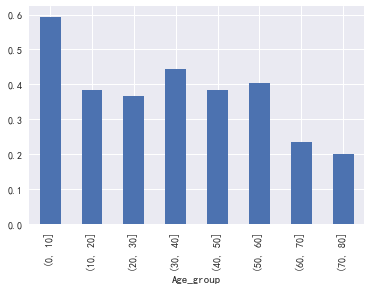

In [16]:
# 由于直接计算绝对人数可能存在误导，所以计算各年龄段死亡人数在其年龄段内所占比例

# plt.subplot2grid((2,2),(0,0),colspan=2)
groupby(['Age_group'])['Survived'].mean().plot(kind='bar')
# plt.subplot(223)
# groupby(['Age_group'])['Survived'].mean().plot(kind='pie',subplots=True,autopct='%.2f%%',colors=['r', 'g', 'b', 'c','y','m','burlywood','deeppink'])
# groupby(['Age_group'])['Survived'].mean()
# plt.subplot(224)
# (1-groupby(['Age_group'])['Survived'].mean()).plot(kind='pie',subplots=True,autopct='%.2f%%',colors=['r', 'g', 'b', 'c','y','m','burlywood','deeppink'])

接着计算其相关系数，呈负相关，但相关系数非常低，几乎可以认为不相关。

In [17]:
# 呈负相关，但相关系数非常低，几乎可以认为不相关

a = titanic_data['Age'].dropna()
index = a.index
b = titanic_data['Survived'][index]
np.corrcoef(a,b)

array([[ 1.        , -0.07722109],
       [-0.07722109,  1.        ]])

## 幸存与上船地点

'Embarked'存在缺失值，为方便分析在初步处理数据时已经将缺失值舍弃。将数据按照上船地点和乘客ID分组后，发现南安普顿上船的人数最多，为644人；皇后镇上船的人最少，77人。猜测南安普顿应该是起航地点，后经查资料证实确实如此。

168

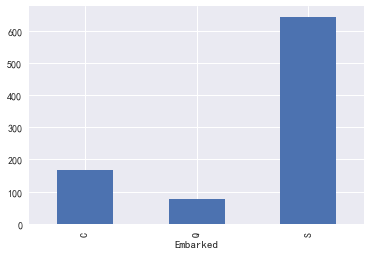

In [18]:
# 南安普顿上船的人数最多，为644人；皇后镇上船的人最少，77人
groupby(['Embarked'])['PassengerId'].count().plot(kind='bar')

C = groupby(['Embarked'])['PassengerId'].count()['C']
Q = groupby(['Embarked'])['PassengerId'].count()['Q']
S = groupby(['Embarked'])['PassengerId'].count()['S']
C

那么将按照幸存情况和上船地点分组后，发现在南安普顿上船的人死亡最多，皇后镇的最少；幸存人数也同样是南安普顿的人最多，皇后镇的人最少。同样由于南安普顿上船的人数太多，所以我们还是分别计算不同地点上船的死亡率和幸存率。经计算发现，瑟堡的幸存率最高，南安普顿的最低；死亡率则南安普顿最高，瑟堡最低。这跟我预想的有点不一样，因为单看人数皇后镇要比瑟堡死的人少，这充分说明了计算各自比例的必要性。


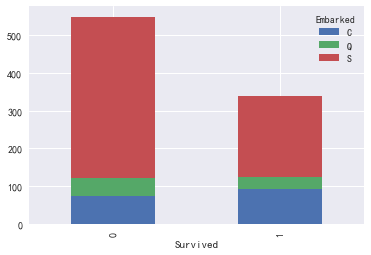

In [19]:
# 从南安普顿上船的人死亡人数最多，而皇后镇的最少；幸存人数同样南安普顿的人最多，皇后镇的人最少

groupby(['Survived','Embarked'])['Survived'].count().unstack().plot(kind='bar',stacked='True')

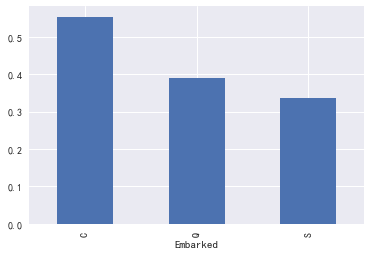

In [20]:
# 瑟堡的幸存率最高，南安普顿的最低；死亡率则南安普顿最高，瑟堡最低

# plt.subplot2grid((2,2),(0,0),colspan=2)
groupby('Embarked')['Survived'].mean().plot(kind='bar')

# plt.subplot(223)
# plt.title('survived')
# groupby('Embarked')['Survived'].mean().plot(kind='pie',autopct='%.2f%%')

# plt.subplot(224)
# plt.title('dead')
# (1-groupby('Embarked')['Survived'].mean()).plot(kind='pie',autopct='%.2f%%')

同样计算相关性，将上船地点分别修改为'C': 1, 'Q': 2, 'S':3，经计算发现呈负相关，但相关性不高，相关系数为-0.17

In [21]:
# 呈负相关，但相关性不高
# 去除空值,将C，Q，S改为1,2,3
a= titanic_data['Embarked'].dropna()
b= a.map( {'C': 1, 'Q': 2, 'S':3} ).astype(int)

index = b.index
c=titanic_data['Survived'][index]
np.corrcoef(b,c)

array([[ 1.        , -0.16971768],
       [-0.16971768,  1.        ]])

## 船费和上船地点

为了进一步探索，为什么南安普顿的死亡率会比较高，而瑟堡的幸存率高，所以探索船费与上船地点之间的关系。发现瑟堡的平均费用最高,约为60，且有一名乘客花费了512元购买了一张一等票，约为瑟堡平均费用的8.5倍。推测瑟堡的消费水平可能很高，要么是经济非常发达，要么就是经济落后，船票奇货可居。皇后镇的平均费用最便宜，为13，且购买一等票的只有2人，推测皇后镇可能消费能力较低或者距离终点最近。而南安普顿平均费用为27，且上船人数最多，推测为始发点（经查资料确认确实如此）。

In [22]:
groupby('Embarked')['Fare'].mean()
# groupby(['Embarked','Pclass']).describe()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

按照上船地点及仓位等级分组后发现，瑟堡的一等舱卖的最贵，南安普顿的最便宜。三等舱则大家都相差不大。

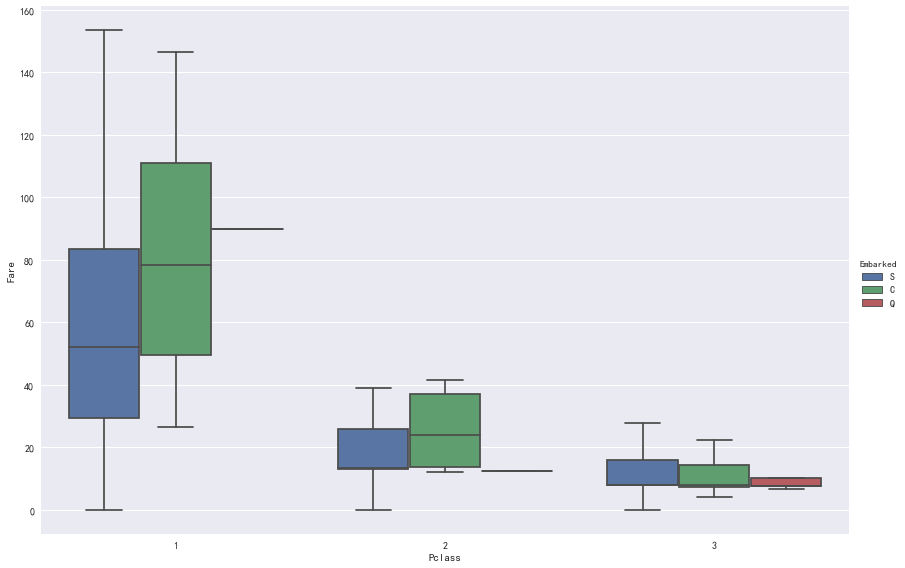

In [23]:
seaborn.factorplot(kind='box',y='Fare',x='Pclass',hue='Embarked',data=titanic_data,sym='',size=8,aspect=1.5)

## 性别与仓位等级关系

在一等二等舱，男女人数差别不大，但在三等舱，男性的数量明显比女性要多一倍有余，推测是有很多底层的男性梦想通过在美国实现财富自由。然后观察不同仓位等级男女的幸存情况，发现不管是哪一个仓位，女性的存活率都远大于男性。

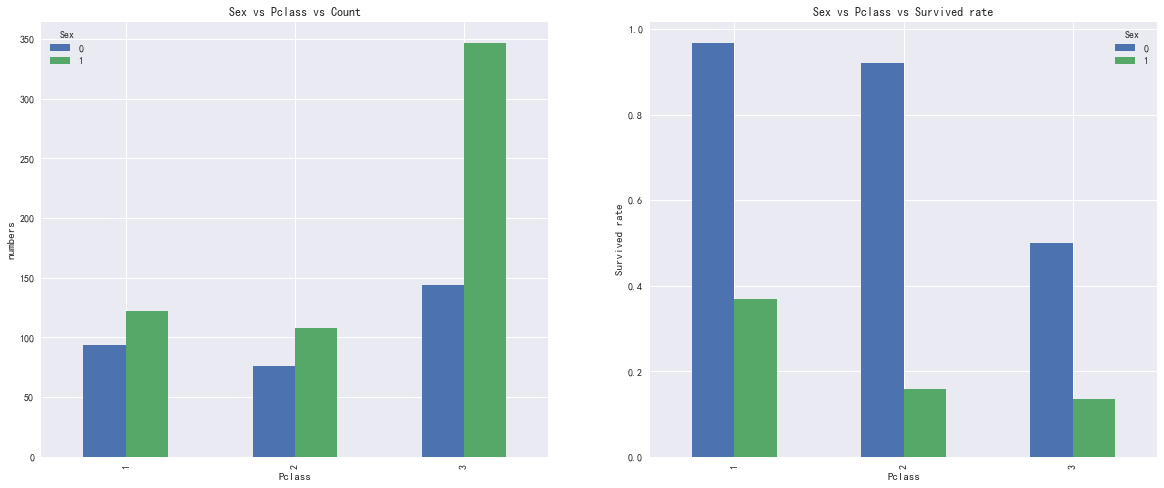

In [24]:
# 在一等二等舱，男女人数差别不大，但在三等舱，男性的数量明显比女性要多一倍有余，推测是有很多底层的男性梦想通过在美国实现财富自由。

plt.figure(figsize=(14,5))
f,(ax1,ax2) = plt.subplots(1,2)
ax1.set_title('Sex vs Pclass vs Count')
ax1.set_ylabel('numbers')
ax2.set_title('Sex vs Pclass vs Survived rate')
ax2.set_ylabel('Survived rate')
f.set_size_inches(20,8)
groupby(['Pclass','Sex'])['Survived'].count().unstack().plot(kind='bar',ax = ax1)
groupby(['Pclass','Sex'])['Survived'].mean().unstack().plot(kind='bar',ax = ax2)

将性别和仓位等级分组后，发现一个有趣的现象，一等舱的男性年龄普遍比女性要大7岁，三等舱大5岁，而二等舱差异则不明显，大2岁。猜测二等舱都是中产阶级，男女差异不大，年龄相仿。一等舱则为成功人士，男性携带年轻的夫人，甚至情妇。而三等舱则尚不明确是什么原因造成的，有待以后的进一步挖掘。


In [25]:
groupby(['Sex','Pclass']).describe()

Age        Fare       Parch  PassengerId       SibSp  \
Sex Pclass                                                                      
0   1      count   85.000000   94.000000   94.000000    94.000000   94.000000   
           mean    34.611765  106.125798    0.457447   469.212766    0.553191   
           std     13.612052   74.259988    0.728305   247.476723    0.665865   
           min      2.000000   25.929200    0.000000     2.000000    0.000000   
           25%     23.000000   57.244800    0.000000   293.500000    0.000000   
           50%     35.000000   82.664550    0.000000   447.000000    0.000000   
           75%     44.000000  134.500000    1.000000   698.250000    1.000000   
           max     63.000000  512.329200    2.000000   888.000000    3.000000   
    2      count   74.000000   76.000000   76.000000    76.000000   76.000000   
           mean    28.722973   21.970121    0.605263   443.105263    0.486842   
           std     12.872702   10.891796    0.833930   243.627288    0.642774   
           min      2.000000   10.500000    0.000000    10.000000    0.000000   
           25%     22.250000   13.000000    0.000000   269.750000    0.000000   
           50%     28.000000   22.000000    0.000000   439.500000    0.000000   
           75%     36.000000   26.062500    1.000000   616.750000    1.000000   
           max     57.000000   65.000000    3.000000   881.000000    3.000000   
    3      count  102.000000  144.000000  144.000000   144.000000  144.000000   
           mean    21.750000   16.118810    0.798611   399.729167    0.895833   
           std     12.729964   11.690314    1.237976   267.232416    1.531573   
           min      0.750000    6.750000    0.000000     3.000000    0.000000   
           25%     14.125000    7.854200    0.000000   165.250000    0.000000   
           50%     21.500000   12.475000    0.000000   376.000000    0.000000   
           75%     29.750000   20.221875    1.000000   636.000000    1.000000   
           max     63.000000   69.550000    6.000000   889.000000    8.000000   
1   1      count  101.000000  122.000000  122.000000   122.000000  122.000000   
           mean    41.281386   67.226127    0.278689   455.729508    0.311475   
           std     15.139570   77.548021    0.658853   247.026449    0.546695   
           min      0.920000    0.000000    0.000000     7.000000    0.000000   
           25%     30.000000   27.728100    0.000000   255.500000    0.000000   
           50%     40.000000   41.262500    0.000000   480.500000    0.000000   
           75%     51.000000   78.459375    0.000000   660.750000    1.000000   
           max     80.000000  512.329200    4.000000   890.000000    3.000000   
    2      count   99.000000  108.000000  108.000000   108.000000  108.000000   
           mean    30.740707   19.741782    0.222222   447.962963    0.342593   
           std     14.793894   14.922235    0.517603   256.922546    0.566380   
           min      0.670000    0.000000    0.000000    18.000000    0.000000   
           25%     23.000000   12.331250    0.000000   225.750000    0.000000   
           50%     30.000000   13.000000    0.000000   416.500000    0.000000   
           75%     36.750000   26.000000    0.000000   677.500000    1.000000   
           max     70.000000   73.500000    2.000000   887.000000    2.000000   
    3      count  253.000000  347.000000  347.000000   347.000000  347.000000   
           mean    26.507589   12.661633    0.224784   455.515850    0.498559   
           std     12.159514   11.681696    0.623404   261.921251    1.288846   
           min      0.420000    0.000000    0.000000     1.000000    0.000000   
           25%     20.000000    7.750000    0.000000   209.500000    0.000000   
           50%     25.000000    7.925000    0.000000   466.000000    0.000000   
           75%     33.000000   10.008300    0.000000   687.500000    0.000000   
           max     74.000000   69.550000    5.000000   8

## 什么名字的人最多

最后，统计了一下叫什么名字的人最多。在去掉了诸如Mr、Miss、Mrs等称谓之后，发现船上叫William的人最多。然而遗憾的是叫William的人死的也最多，不过你以为这就完了？不，叫William的人同样也是幸存最多的人。不得不说，William真是一个神奇的名字啊！！！

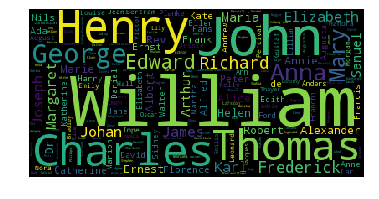

In [26]:

from wordcloud import WordCloud,STOPWORDS

def wc(data):


    word=''
    for i in data1:
        word += i

    WC = WordCloud(stopwords={'Mr','Miss','Mrs','Master'}).generate(word)


    plt.figure()
    plt.imshow(WC)
    plt.axis("off")

data1 = titanic_data['Name'].tolist()
wc(data1)

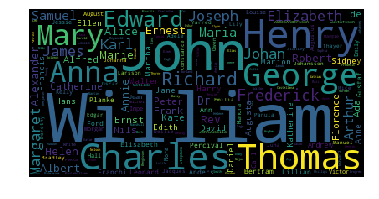

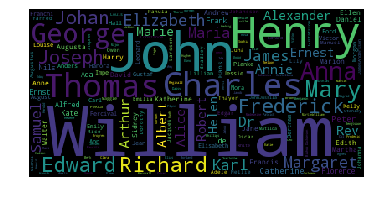

In [27]:
# 死亡姓名
data3 = titanic_data.ix[:,['Survived','Name']].set_index('Survived')
dead = data3['Name'][0]
wc(dead)

# 幸存姓名
data3 = titanic_data.ix[:,['Survived','Name']].set_index('Survived')
survived = data3['Name'][1]
wc(survived)

## 总结

本次分析探索了存活情况与仓位等级、性别、年龄、登船地点之间可能存在的关系，以及性别与仓位等级、船费与登船地点之间的关系。依据数据得出的结论为——仓位等级越高存活率越高；女性比男性存活率高；儿童存活率比成年人高；瑟堡登船的存活率比其他两个地方高；而三等舱的男性人数比其他所有仓位的都高，但不管哪一个仓位，女性的存活率都远大于男性；以及瑟堡的平均费用最高，皇后镇的最便宜。 但是由于本数据样本并非所有乘客的数据都齐全，有些数据存在空值，所以可能存在一些统计学上的偏差。不过由于我们只针对泰坦尼克号的乘客进行分析，该样本基本包含了所有乘客，因此得出的分析结论具有一定的代表性，可以认为是正确的。当然在统计的过程中，采取的一些方法肯定会对真实的情况造成一定偏差，例如在处理空值时，我是直接用dropna()丢弃了，虽然由于数目较少不会造成大的影响，但是偏差肯定是存在的。 另外还有很多其他的因素也有可能影响到存活率但是我们并没有相关数据，比如说当日的水温，乘客是否会游泳等，这些都会影响到存活率。 综上，本文只在结合该样本数据的情况下，经合理分析得出相关结论，大部分结论具有相关性，但不排除个别结论与真实情况相距甚远。